# Práctica: Verificación de supuestos

Sigues siendo un asistente de investigación en una consulta de investigación de mercado. Continuas analizando los datos de una encuesta sobre la percepción de una compañía tecnológica. Esta cuenta con 9 variables cuantitativas (X1 a X9) relacionadas a la percepción del desempeño de la compañía.

In [2]:
!pip install pingouin
!pip install pyreadstat
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AnalisisDeDatosMultivariantes/HATCO.sav

In [1]:
import pandas as pd
import numpy as np

df = pd.read_spss("HATCO.sav")
df.dropna(inplace=True)
df

,Caso,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,1.00,41.0,6.0,69.0,47.0,24.0,23.0,52.0,0.0,320.0,42.0,1.0,0.0,1.0,1.0
1,2.00,18.0,30.0,63.0,66.0,25.0,40.0,84.0,1.0,430.0,43.0,0.0,1.0,0.0,1.0
2,3.00,34.0,52.0,57.0,60.0,43.0,27.0,82.0,1.0,480.0,52.0,0.0,1.0,1.0,2.0
3,4.00,27.0,10.0,71.0,59.0,18.0,23.0,78.0,1.0,320.0,39.0,0.0,1.0,1.0,1.0
4,5.00,60.0,9.0,96.0,78.0,34.0,46.0,45.0,0.0,580.0,68.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.00,6.0,16.0,64.0,50.0,7.0,21.0,84.0,1.0,250.0,34.0,0.0,1.0,1.0,1.0
96,97.00,61.0,5.0,92.0,48.0,33.0,28.0,71.0,0.0,600.0,52.0,1.0,0.0,1.0,3.0
97,98.00,20.0,28.0,52.0,50.0,24.0,27.0,84.0,1.0,380.0,37.0,0.0,1.0,0.0,1.0
98,99.00,31.0,22.0,67.0,68.0,26.0,29.0,84.0,1.0,420.0,43.0,0.0,1.0,0.0,1.0


## Parte 1: Normalidad

Analiza la normalidad de la variable X9 utilizando un QQ-Plot. ¿Qué puedes concluir en relación al gráfico?
>Sugerencia: Utiliza la función `qqplot` disponible en el paquete `pingouin`.

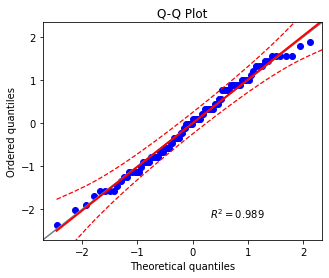

In [2]:
import pingouin as pg
import matplotlib.pyplot as plt

# Escribe tu respuesta aquí
pg.qqplot(df["X9"], dist="norm")
plt.show()

Si bien la línea que representa a los datos presenta algunas curvaturas, puede apreciarse que se acerca mucho a la recta que representa a la distribución normal. Es posible que el supuesto de normalidad se cumpla. 

Aplica una prueba inferencial para examinar la normalidad de la variable X9. ¿Qué puedes concluir? 
>Sugerencia: Utiliza la función `normality` disponible en el paquete `pingouin`.

In [3]:
# Escribe tu respuesta aquí
pg.normality(df["X9"], method="normaltest")

,W,pval,normal
X9,4.678292,0.09641,True


La prueba de D'Agostino y Pearson nos indica que no podemos rechazar la hipótesis nula. Por tanto, podemos operar asumiendo que la distribución de la variable X9 es normal.

## Parte 2: Homogeneidad de varianzas

Explora gráficamente si las variables X3 y X9 presentan varianzas homogéneas. ¿Qué puedes concluir en relación al gráfico?

>Sugerencia: Utiliza la función `jointplot` disponible en el paquete `seaborn`.

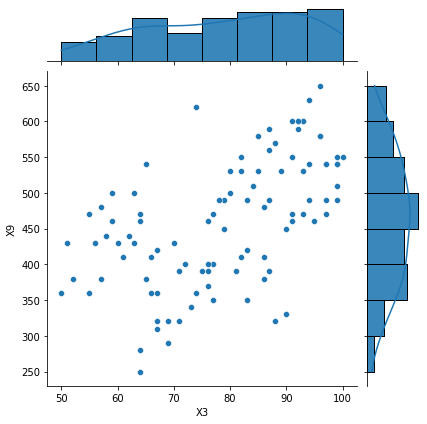

In [4]:
import seaborn as sns

# Escribe tu respuesta aquí
ax = sns.jointplot(x="X3", y="X9", data=df)
ax.plot_marginals(sns.histplot, kde=True)
plt.show()

Gráficamente puede apreciarse que las varianzas no son del todo homogéneas debido a que hay secciones donde hay una mayor acumulación de datos.

Emplea una prueba inferencial para examinar la homogeneidad de las varianzas entre X3 y X9. ¿Qué puedes concluir?

>Sugerencia: Utiliza la función `homoscedasticity` disponible en el paquete `pingouin`.

In [5]:
# Escribe tu respuesta aquí
pg.homoscedasticity(df[["X3", "X9"]])

,W,pval,equal_var
levene,152.875233,2.140096e-26,False


La prueba de levene nos señala que no podemos asumir que las varianzas entre estas dos distribuciones son homogéneas, lo cual confirma lo analizado gráficamente. 

## Parte 3: Linealidad

Verifica gráficamente si la relación entre ambas variables es lineal. ¿Qué puedes concluir en relación al gráfico?
> Sugerencia: Utiliza la función `lmplot` disponible en el paquete seaborn.

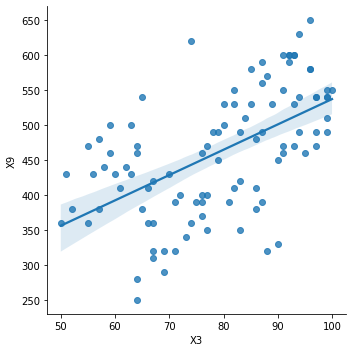

In [6]:
sns.lmplot(x="X3", y="X9", data=df)
plt.show()

De acuerdo al gráfico, la mayoría de los datos escapa a una relación lineal entre ambas variables. En este caso es difícil sostener el supuesto de linealidad. 

## Parte 4: Transformación de los datos

Convierte tus datos a una distribución Z y verifica gráficamente si la ausencia de linealidad y homocedasticidad persiste. ¿Qué puedes comentar en relación a tus resultados?
>Sugerencia: Utiliza la función `StandardScaler` disponible en el paquete `sklearn`.

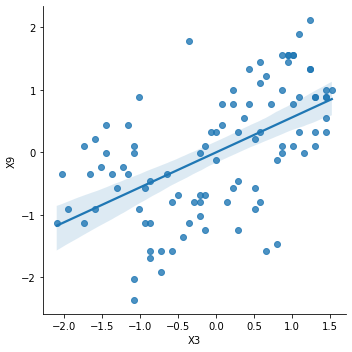

In [7]:
from sklearn.preprocessing import StandardScaler

# Escribe tu respuesta aquí
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[["X3", "X9"]])
scaled_df = pd.DataFrame(scaled_data, columns=["X3", "X9"])
sns.lmplot(x="X3", y="X9", data=scaled_df)
plt.show()

La ausencia de linealidad y homocedasticidad entre X9 y X3 persiste incluso después de aplicar una estandarización. En este caso, correspondería que los investigadores analicen si hay alguna fuente externa o variable adicional que pueda estar influyendo en la varianza de las dos variables en cuestión. 